In [1]:
from arbre_binaire import Noeud, Arbre
from draw_arbre import afficher

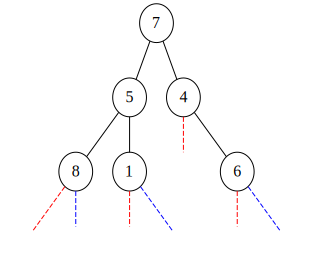

In [2]:
n=Noeud(7,Noeud(5,Noeud(8),Noeud(1)),Noeud(4,None,Noeud(6)))
a=Arbre(n)
afficher(a,'jpg')

In [3]:
"""
Fonctions utilisant les méthodes d'arbres
"""
def taille(a):
    if a.est_vide():
        return 0
    else:
        return 1 + taille(a.fils_gauche()) + taille(a.fils_droit())

def hauteur(a):
    if a.est_vide():
        return -1
    else:
        return 1 + max(hauteur(a.fils_gauche()),hauteur(a.fils_droit()))

def niveau(a,p,nds=[]):
    if p == 0:
        if not a.est_vide():
            # on empile dans une liste les valeurs
            nds.append(a.racine.valeur)
    else:
        niveau(a.fils_gauche(),p-1,nds)
        niveau(a.fils_droit(),p-1,nds)
    return nds

print("Taille de l'arbre:",taille(a))
print("Hauteur de l'arbre:",hauteur(a))
for i in range(hauteur(a)+1):
    print("Niveau %s : %s" % (i,niveau(a,i,[])))

Taille de l'arbre: 6
Hauteur de l'arbre: 2
Niveau 0 : [7]
Niveau 1 : [5, 4]
Niveau 2 : [8, 1, 6]


In [4]:
class ABR(Arbre):
    
    def __init__(self,a):
        self.racine=a
        
    def appartenir(self,x):
        return appartient(x,self.racine)
    
    def ajouter(self,x):
        self.racine=ajoute(x,self.racine)
        
    def supprimer(self,x):
        self.racine=supprime(x,self.racine)

In [4]:
def appartient(x,a):
    if a.est_vide():
        return False
    else:
        if x < a.racine.valeur:
            return appartient(x,a.fils_gauche())
        elif x > a.racine.valeur:
            return appartient(x,a.fils_droit())
        else:
            return True
        
appartient(3,a)

False

In [5]:
abr=ABR(a)
abr.appartenir(5)

Traceback (most recent call last):
  File "<input>", line 1, in <module>
NameError: name 'ABR' is not defined


In [6]:
n=Noeud(None)
a=Arbre(n)
print(type(a))

<class 'arbre_binaire.Arbre'>


In [7]:
n=Noeud(None)
a=Arbre(n)
print(type(a))

def ajoute(x,a):
    """
    Si l'abr a est vide, on crée un Noeud avec x comme valeur.
    Donc a.racine -> Noeud(x,None,None)
    """
    if a.est_vide():
        a.racine = Noeud(x)
        return a        
    else:
        print("racine=",a.racine.valeur)
        if x < a.racine.valeur:
            print(a)
            return Arbre(Noeud(a.racine.valeur,ajoute(x,a.fils_gauche()),a.racine.droit))  
        elif x > a.racine.valeur:
            print(a)
            return Arbre(Noeud(a.racine.valeur,a.racine.gauche,ajoute(x,a.fils_droit())))
    return a #Noeud(a.valeur,a.gauche,a.droit)
        
a=ajoute(3,a)
print(type(a),a)
a=ajoute(2,a)
print(type(a),a)
a=ajoute(5,a)
print(type(a),a)
a=ajoute(7,a)

<class 'arbre_binaire.Arbre'>
<class 'arbre_binaire.Arbre'> Noeud(3,None,None)
racine= 3
Noeud(3,None,None)
<class 'arbre_binaire.Arbre'> Noeud(3,Noeud(2,None,None),None)
racine= 3
Noeud(3,Noeud(2,None,None),None)
<class 'arbre_binaire.Arbre'> Noeud(3,Noeud(2,None,None),Noeud(5,None,None))
racine= 3
Noeud(3,Noeud(2,None,None),Noeud(5,None,None))
racine= Noeud(5,None,None)


Traceback (most recent call last):
  File "<input>", line 29, in <module>
  File "<input>", line 20, in ajoute
  File "<input>", line 15, in ajoute
TypeError: '<' not supported between instances of 'int' and 'Arbre'


In [133]:
print(type(a),a)

<class 'arbre_binaire.Arbre'> Noeud(3,Noeud(2,None,None),Noeud(5,None,None))


In [ ]:
        
def minimum(a):
    if a.gauche is None:
        return a.valeur
    else:
        return minimum(a.gauche)
    
def supprime_minimum(a):
    if a.gauche is None:
        return a.droit
    else:
        return Noeud(a.valeur,supprime_minimum(a.gauche),a.droit)
    
def supprime(x,a):
    if a is None:
        return None
    else:
        if x<a.valeur:
            return Noeud(a.valeur,supprime(x,a.gauche),a.droit)
        elif x>a.valeur:
            return Noeud(a.valeur,a.gauche,supprime(x,a.droit))
        else:
            if a.droit is None:
                return a.gauche
            else:
                return Noeud(minimum(a.droit),a.gauche,supprime_minimum(a.droit))
            
def ajoute2(x,a):
    """
    Si l'abr a est vide, on crée un Noeud avec x comme valeur.
    Donc a.racine -> Noeud(x,None,None)
    """
    if a is None:
        return Noeud(x,None,None)
    else:
        if not (appartient(x,a)):
            if x<a.valeur:
                return Noeud(a.valeur,ajoute(x,a.gauche),a.droit)
            elif x>a.valeur:
                return Noeud(a.valeur,a.gauche,ajoute(x,a.droit))
        #else:
            #return a #Noeud(a.valeur,a.gauche,a.droit)